# Mask R-CNN - Visualize Dataset

Inspect and visualize data loading and pre-processing code.

In [53]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.guns_and_swords import gns

%matplotlib inline 

## Configurations

Configurations are defined in balloon.py

In [54]:
config = gns.gnsConfig()
GNS_DIR = "/home/vpatel2/Rahul/objectDetection/procdata"

## Dataset

In [55]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = gns.gnsDataset()
dataset.load_gns(GNS_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 66
Class Count: 3
  0. BG                                                
  1. sword                                             
  2. gun                                               


In [56]:
dataset.class_names

['BG', 'sword', 'gun']

In [57]:
class_ids

array([2, 2])

## Display Samples

Load and display images and masks.

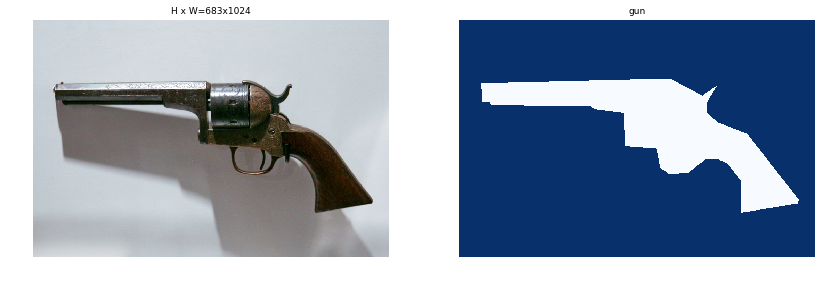

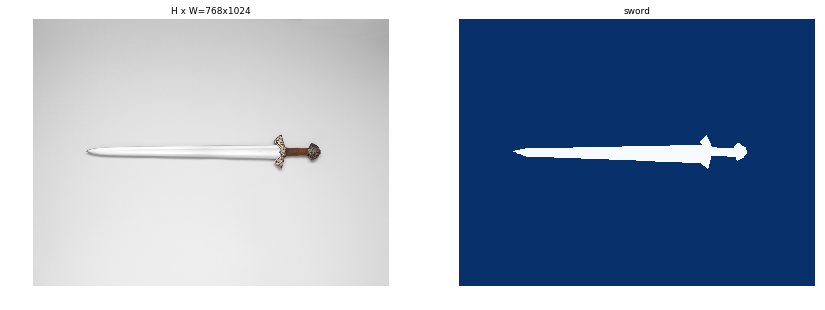

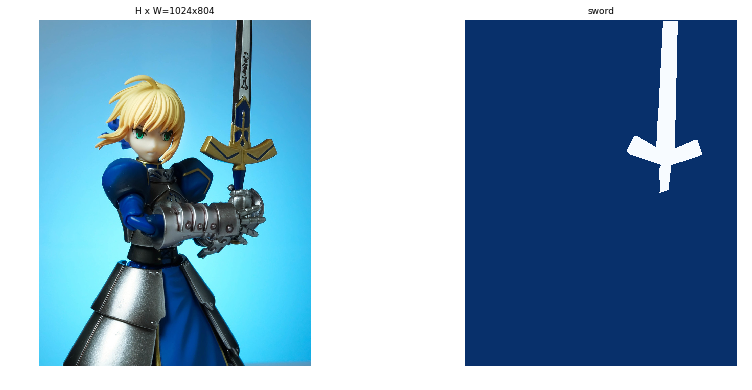

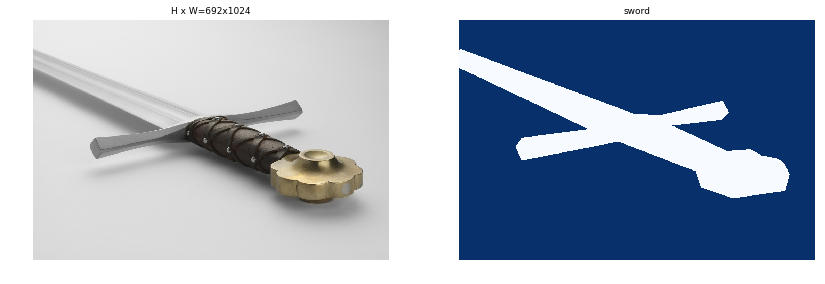

In [58]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    class_ids = [int(x) for x in class_ids]
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names,limit=1)

## Bounding Boxes

Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

image_id  25 /home/vpatel2/Rahul/objectDetection/procdata/train/7a1396405f071d8d.jpg
image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (768, 1024, 1)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    2.00000  max:    2.00000  int64
bbox                     shape: (1, 4)                min:   84.00000  max:  740.00000  int32


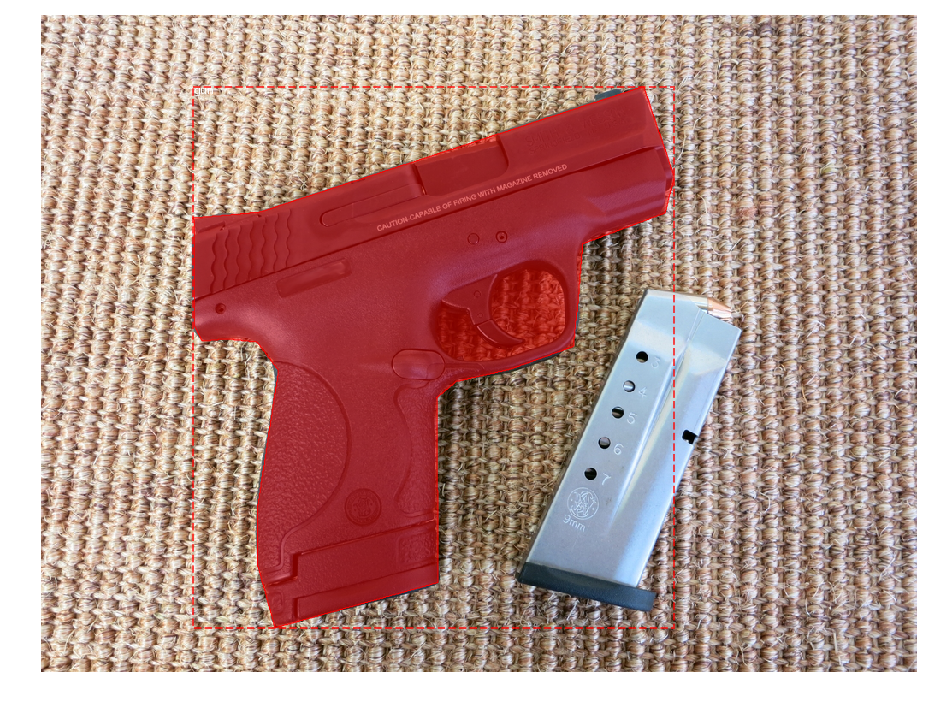

In [59]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
class_ids = np.array([int(x) for x in class_ids])
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id  38 /home/vpatel2/Rahul/objectDetection/procdata/train/4c748aabec55feea.jpg
image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (768, 1024, 1)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    2.00000  max:    2.00000  int64
bbox                     shape: (1, 4)                min:    3.00000  max: 1022.00000  int32


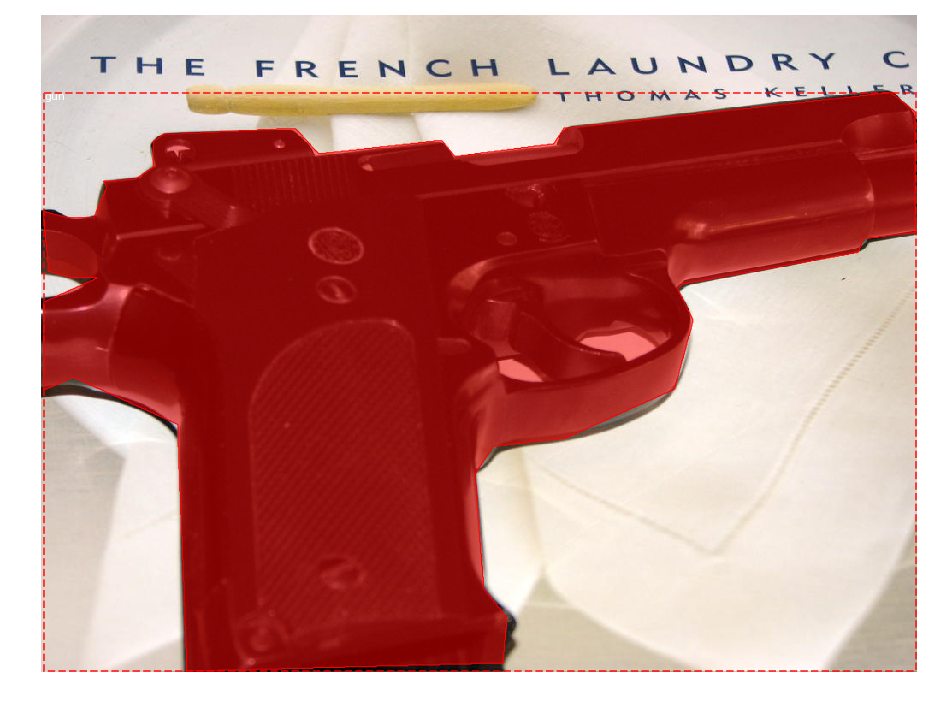

In [60]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
class_ids = np.array([int(x) for x in class_ids])
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id  20 /home/vpatel2/Rahul/objectDetection/procdata/train/02eff940ae3f0189.jpg
image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (768, 1024, 1)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    2.00000  max:    2.00000  int64
bbox                     shape: (1, 4)                min:    2.00000  max: 1001.00000  int32


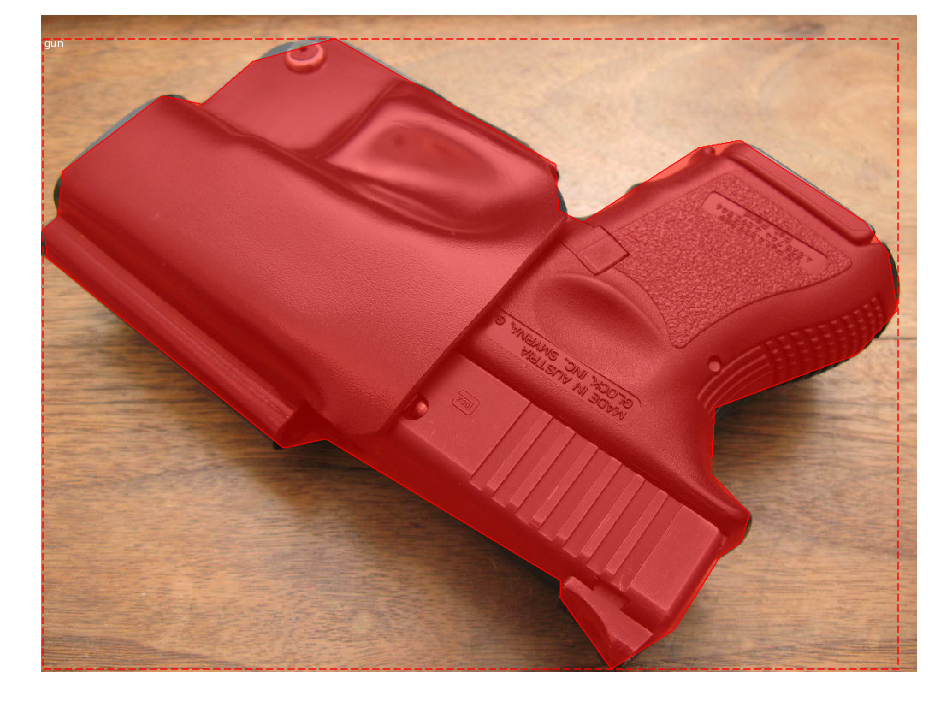

In [61]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
class_ids = np.array([int(x) for x in class_ids])
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id  65 /home/vpatel2/Rahul/objectDetection/procdata/train/5fb1779480f31a71.jpg
image                    shape: (681, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (681, 1024, 1)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    2.00000  max:    2.00000  int64
bbox                     shape: (1, 4)                min:  321.00000  max:  795.00000  int32


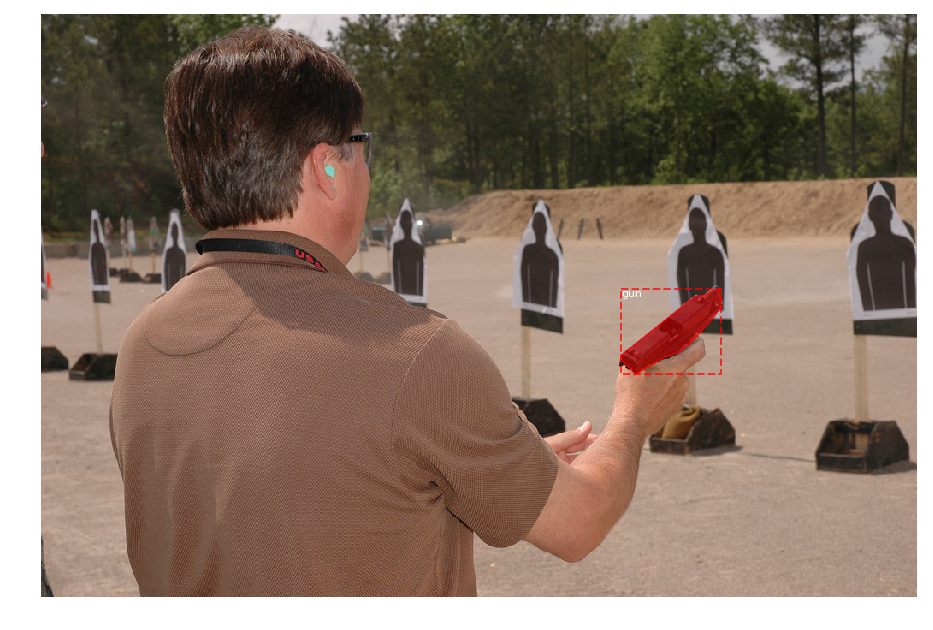

In [62]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
class_ids = np.array([int(x) for x in class_ids])
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)